In [86]:
import pandas as pd

#코로나 csv 파일 읽어오기
raw_df = pd.read_csv('C:\data\owid-covid-data.csv')

# 1) 원하는 열 리스트 만들기
selected_columns = ['location', 'date', 'total_cases']

# 2) 원라는 열로 개정된 데이터프레임 생성
revised_df = raw_df[selected_columns]

# 3) 개정된 데이터프레임 데이터 일부 확인하기
revised_df

,location,date,total_cases
0,Afghanistan,2020-01-03,NaN
1,Afghanistan,2020-01-04,NaN
2,Afghanistan,2020-01-05,NaN
3,Afghanistan,2020-01-06,NaN
4,Afghanistan,2020-01-07,NaN
...,...,...,...
297232,Zimbabwe,2023-03-17,264391.0
297233,Zimbabwe,2023-03-18,264391.0
297234,Zimbabwe,2023-03-19,264391.0
297235,Zimbabwe,2023-03-20,264391.0


In [87]:
from prophet import Prophet

In [88]:
locations = revised_df['location']
locations

0         Afghanistan
1         Afghanistan
2         Afghanistan
3         Afghanistan
4         Afghanistan
             ...     
297232       Zimbabwe
297233       Zimbabwe
297234       Zimbabwe
297235       Zimbabwe
297236       Zimbabwe
Name: location, Length: 297237, dtype: object

In [105]:
# China 데이터 프레임 생성하기
cha_df = revised_df[revised_df.location == "China"]

#데이터 일부 확인하기
cha_df

,location,date,total_cases
51696,China,2020-01-03,NaN
51697,China,2020-01-04,1.0
51698,China,2020-01-05,1.0
51699,China,2020-01-06,4.0
51700,China,2020-01-07,4.0
...,...,...,...
52865,China,2023-03-17,99204384.0
52866,China,2023-03-18,99204384.0
52867,China,2023-03-19,99224504.0
52868,China,2023-03-20,99229372.0


In [106]:
#필요한 열 추출
final_cha_df = cha_df[['date', 'total_cases']]

final_cha_df

,date,total_cases
51696,2020-01-03,NaN
51697,2020-01-04,1.0
51698,2020-01-05,1.0
51699,2020-01-06,4.0
51700,2020-01-07,4.0
...,...,...
52865,2023-03-17,99204384.0
52866,2023-03-18,99204384.0
52867,2023-03-19,99224504.0
52868,2023-03-20,99229372.0


In [109]:
final_cha_df.rename(columns={'date':'ds', 'total_cases' : 'y'}, inplace=True)
final_cha_df

C:\Users\user\AppData\Local\Temp\ipykernel_10784\838368273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_cha_df.rename(columns={'date':'ds', 'total_cases' : 'y'}, inplace=True)


,ds,y
51696,2020-01-03,NaN
51697,2020-01-04,1.0
51698,2020-01-05,1.0
51699,2020-01-06,4.0
51700,2020-01-07,4.0
...,...,...
52865,2023-03-17,99204384.0
52866,2023-03-18,99204384.0
52867,2023-03-19,99224504.0
52868,2023-03-20,99229372.0


In [110]:
m = Prophet()

m.fit(final_cha_df)

15:23:29 - cmdstanpy - INFO - Chain [1] start processing
15:23:30 - cmdstanpy - INFO - Chain [1] done processing


In [111]:
future = m.make_future_dataframe(periods=365)

future.tail()

,ds
1534,2024-03-16
1535,2024-03-17
1536,2024-03-18
1537,2024-03-19
1538,2024-03-20


In [112]:
forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1534,2024-03-16,2.629613e+08,2.278941e+08,2.953765e+08
1535,2024-03-17,2.633973e+08,2.275983e+08,2.974576e+08
1536,2024-03-18,2.638269e+08,2.278008e+08,2.984087e+08
1537,2024-03-19,2.642535e+08,2.295584e+08,3.002577e+08
1538,2024-03-20,2.647034e+08,2.292778e+08,2.993054e+08


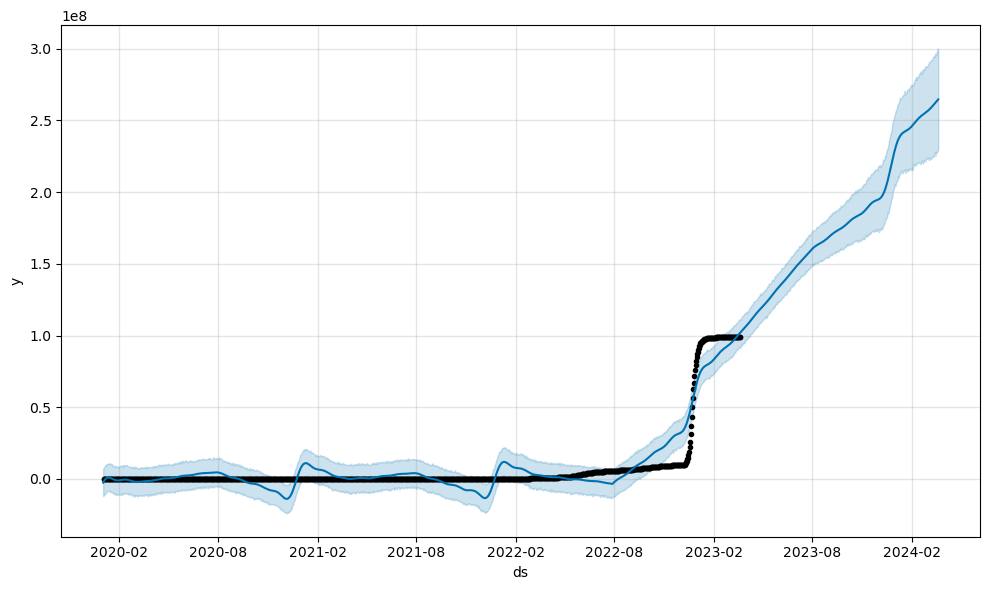

In [113]:
fig1 = m.plot(forecast)

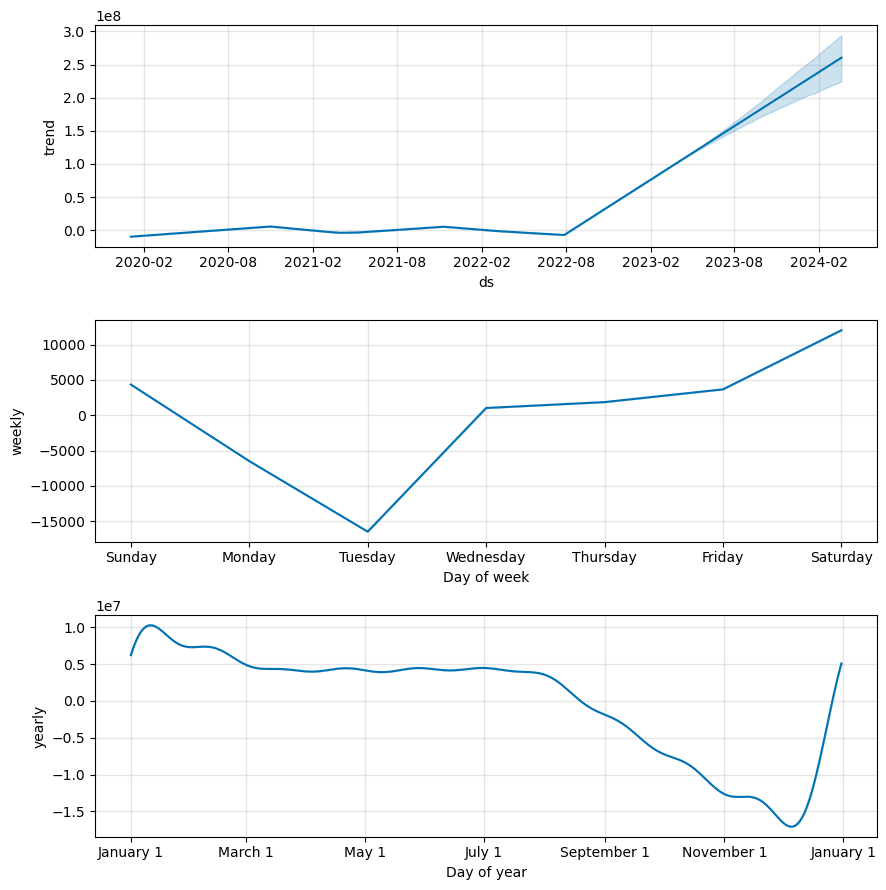

In [114]:
fig2 = m.plot_components(forecast)